# Sequences in Orlicz spaces

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DyonOylloug/numerical_function_spaces/HEAD?labpath=docs%2Fsequences.ipynb) - link to interactive notebooks session.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # for progress bar
import numerical_function_spaces.orlicz_spaces as osm

In [3]:
def Orlicz_function(u):
    # return np.where(u <= 1, u ** 2, np.where(u <= 2, 2 * u - 1, u ** 3 * 3 / 8))
    # or
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            Phi[i] = u[i] ** 2
        elif u[i] <= 2:
            Phi[i] = 2 * u[i] - 1
        else:
            Phi[i] = 3 / 8 * u[i] ** 3
    return Phi

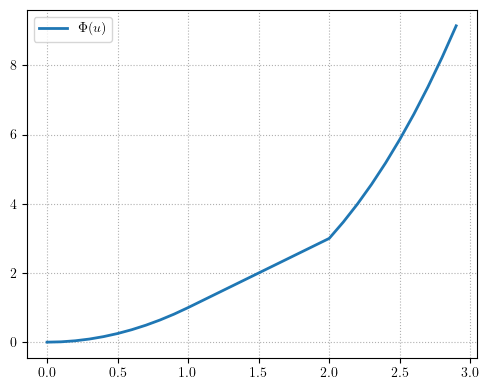

In [4]:
osm.plot_Phi(Orlicz_function, u_max=3, du=0.1)

Define sequence of characteristic functions  
\begin{equation*}
x_n(t) = \chi_{\left[0,c_n\right)}(t)
\end{equation*}
for $c_n =  \frac{n}{n_{max}}\cdot{t_{max}}$

In [5]:
t_max = 2
n_min, n_max = 1, 100
len_t = 1
x_n = np.zeros(shape=(2, len_t))

norms_1 = []
norms_2 = []
norms_inf = []

for n in tqdm(range(n_min, n_max), disable=False):  # set disable=False for progress bar
    x_n[1, :] = n * t_max / n_max  # miara nośnika
    x_n[0, :] = 1
    norms_1.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x_n, p_norm=1))
    norms_2.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x_n, p_norm=2))
    norms_inf.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x_n, p_norm=np.inf))

100%|██████████| 99/99 [01:13<00:00,  1.35it/s]


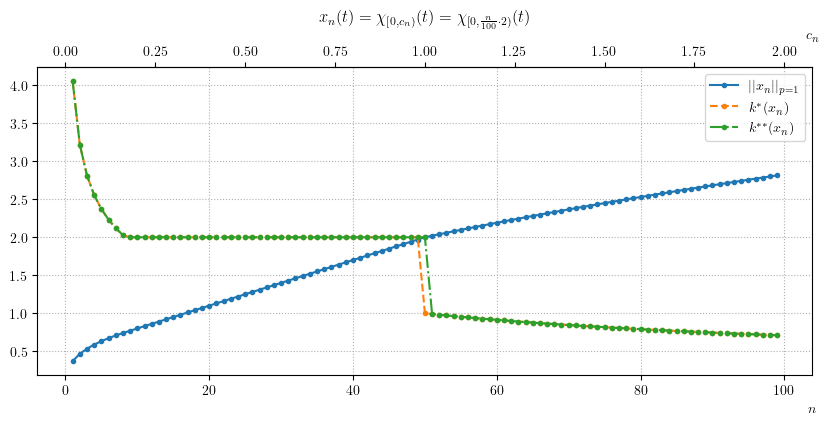

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(np.arange(n_min, n_max), [norms_1[1] for norms_1 in norms_1], ".--", label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_1[2] for norms_1 in norms_1], '.-.', label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

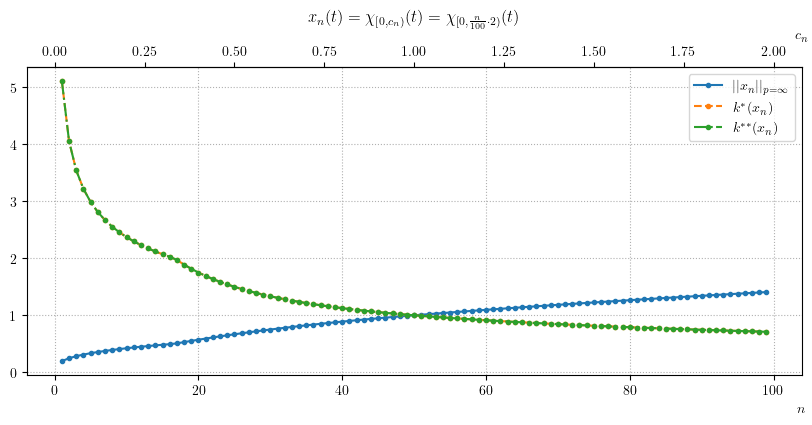

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_inf[0] for norms_inf in norms_inf], ".-",label='$||x_n||_{p=\infty}$')
ax.plot(np.arange(n_min, n_max), [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[2] for norms_inf in norms_inf], ".-.", label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
plt.legend();

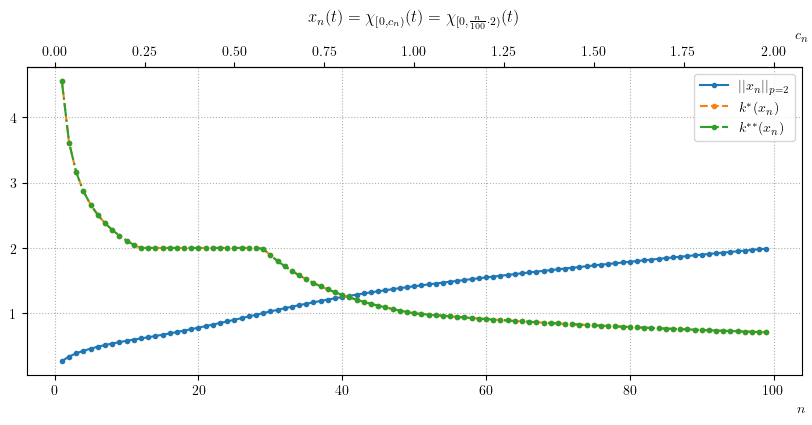

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_2[0] for norms_2 in norms_2], ".-",label='$||x_n||_{p=2}$')
ax.plot(np.arange(n_min, n_max), [norms_2[1] for norms_2 in norms_2], ".--",
        label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[2] for norms_2 in norms_2], ".-.",
        label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1);
ax.legend();

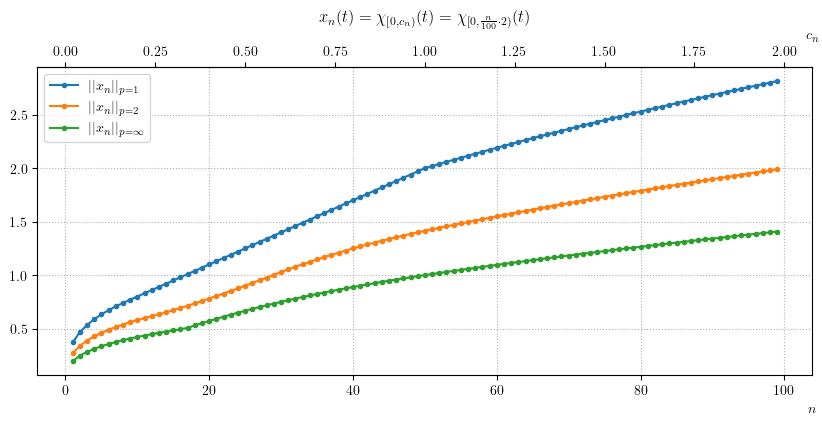

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[0] for norms_1 in norms_1], ".-",label='$||x_n||_{p=1}$')
ax.plot(np.arange(n_min, n_max), [norms_2[0] for norms_2 in norms_2], ".-",label='$||x_n||_{p=2}$')
ax.plot(np.arange(n_min, n_max), [norms_inf[0] for norms_inf in norms_inf], ".-",label='$||x_n||_{p=\infty}$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

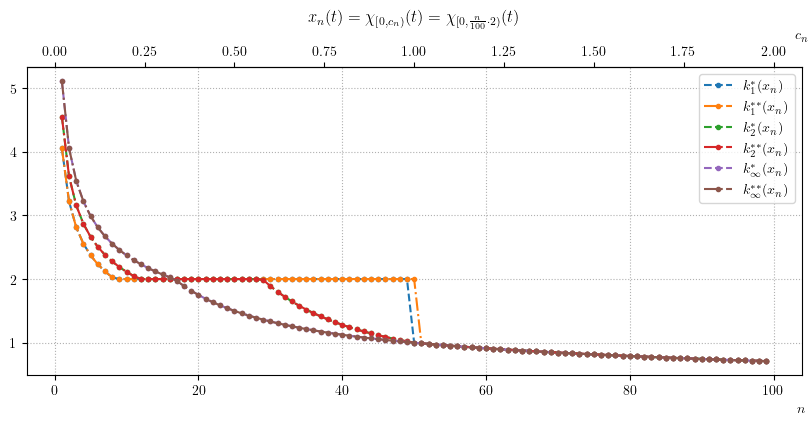

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[1] for norms_1 in norms_1], ".--", label='$k_1^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_1[2] for norms_1 in norms_1], ".-.", label='$k_1^{**}(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[1] for norms_2 in norms_2], ".--", label='$k_2^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[2] for norms_2 in norms_2], ".-.",label='$k_2^{**}(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k_{{\\infty}}^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[2] for norms_inf in norms_inf], ".-.",
        label='$k_{{\\infty}}^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

On the first plot we may see something interesting for $x_{50} = \chi_{[0,1)}(t)$
 

In [11]:
x=np.array([[1], [1]])

In [12]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=1)

(np.float64(1.9999999999999998),
 np.float64(0.9998683723630417),
 np.float64(1.9998172564912515))

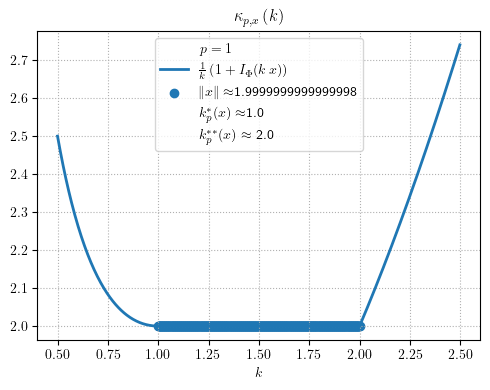

In [13]:
osm.plot_kappa(Orlicz_function, x=x, p_norm=1, k_min=0.5, k_max=2.5)

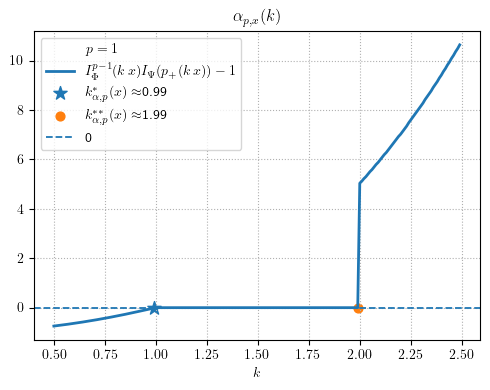

In [14]:
osm.plot_alpha(Orlicz_function, x=x, p_norm=1, du=0.01, u_max=10,
               dk=0.01, k_min=0.5, k_max=2.5)

Define another Orlicz function

In [15]:
def Orlicz_function(u):
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        n = -1
        while True:
            if u[i] > n and u[i] <= n + 1:  # below two conjugated functions?
                Phi[i] = (n + 1) * u[i] - (n + 1) * n / 2
                # Phi[i] = n * u[i] - (n) * (n + 1) / 2
                break
            n = n + 1
    return Phi

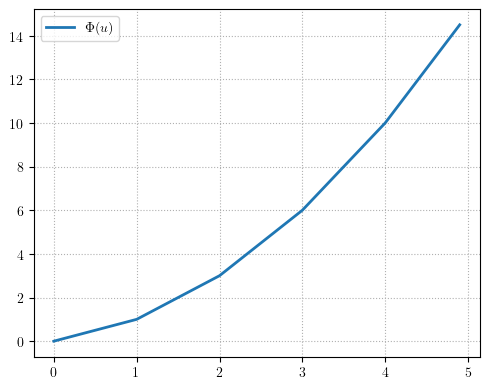

In [16]:
osm.plot_Phi(Orlicz_function, u_max=5, du=0.1)

and the same $x_n$ sequence

In [17]:
t_max = 2
n_min, n_max = 1, 100
len_t = 1
x_n = np.zeros(shape=(2, len_t))

norms_1 = []
norms_2 = []
norms_inf = []

for n in tqdm(range(n_min, n_max), disable=False):  # set disable=False for progress bar
    x_n[1, :] = n * t_max / n_max  # miara nośnika
    x_n[0, :] = 1
    norms_1.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x_n, p_norm=1))
    norms_2.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x_n, p_norm=2))
    norms_inf.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x_n, p_norm=np.inf))

100%|██████████| 99/99 [01:45<00:00,  1.07s/it]


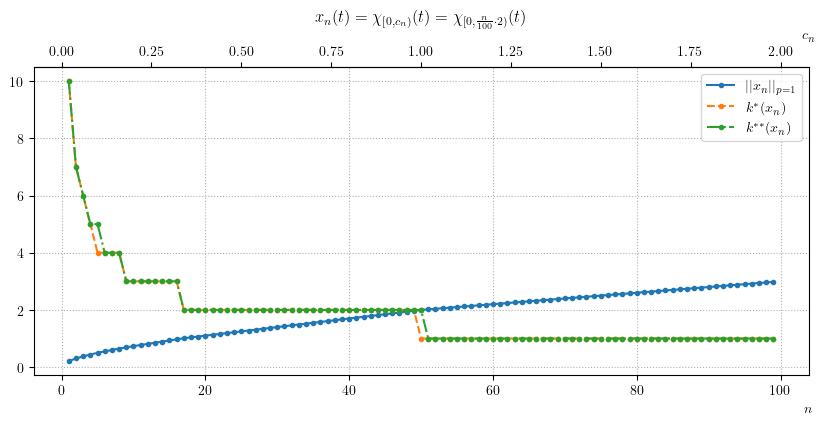

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(np.arange(n_min, n_max), [norms_1[1] for norms_1 in norms_1], ".--", label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_1[2] for norms_1 in norms_1], '.-.', label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

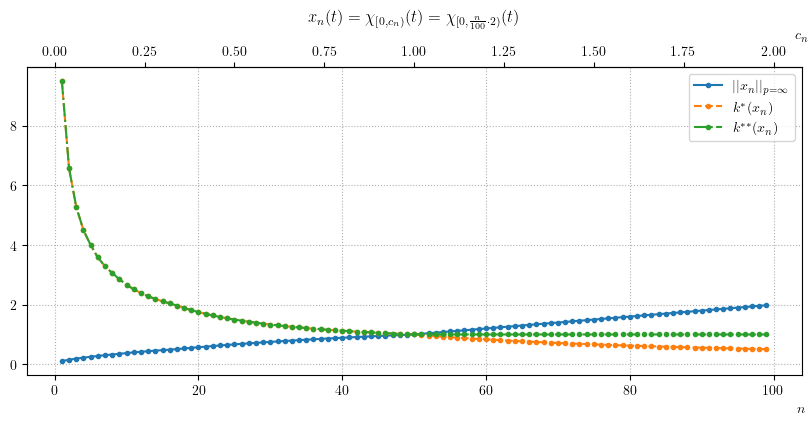

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_inf[0] for norms_inf in norms_inf], ".-",label='$||x_n||_{p=\infty}$')
ax.plot(np.arange(n_min, n_max), [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[2] for norms_inf in norms_inf], ".-.", label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
plt.legend();

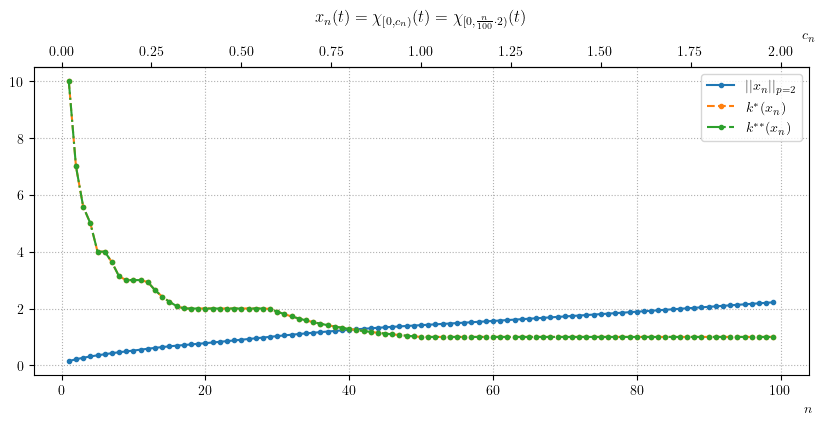

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_2[0] for norms_2 in norms_2], ".-",label='$||x_n||_{p=2}$')
ax.plot(np.arange(n_min, n_max), [norms_2[1] for norms_2 in norms_2], ".--",
        label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[2] for norms_2 in norms_2], ".-.",
        label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1);
ax.legend();

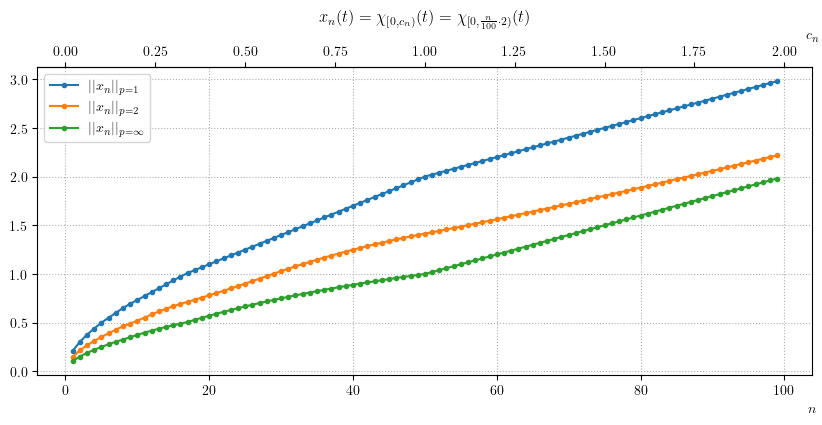

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[0] for norms_1 in norms_1], ".-",label='$||x_n||_{p=1}$')
ax.plot(np.arange(n_min, n_max), [norms_2[0] for norms_2 in norms_2], ".-",label='$||x_n||_{p=2}$')
ax.plot(np.arange(n_min, n_max), [norms_inf[0] for norms_inf in norms_inf], ".-",label='$||x_n||_{p=\infty}$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

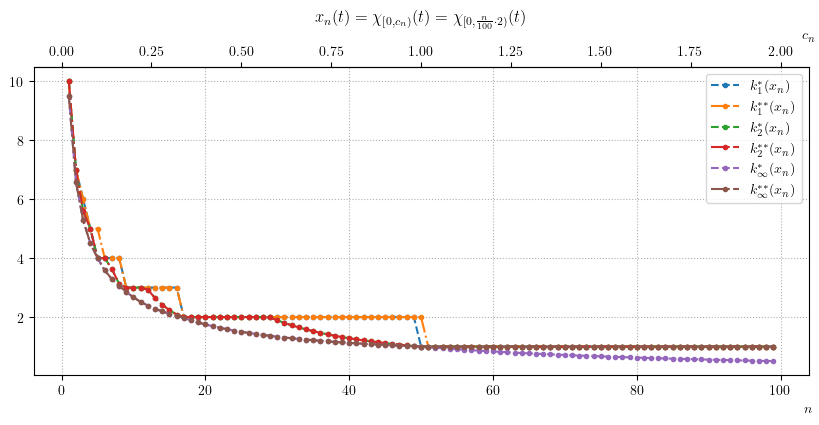

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[1] for norms_1 in norms_1], ".--", label='$k_1^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_1[2] for norms_1 in norms_1], ".-.", label='$k_1^{**}(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[1] for norms_2 in norms_2], ".--", label='$k_2^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[2] for norms_2 in norms_2], ".-.",label='$k_2^{**}(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k_{{\\infty}}^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[2] for norms_inf in norms_inf], ".-.",
        label='$k_{{\\infty}}^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

Define another sequence
\begin{equation*}
x_n(t) = \cos(t) \cdot \chi_{\left[0,c_n\right)}(t)$
\end{equation*}
for $c_n =  \frac{n}{n_{max}}\cdot{t_{max}}$

In [23]:
t_max = 2 * np.pi  # for domain of t
len_t = 1000
norms_1 = []
norms_2 = []
norms_inf = []
n_min, n_max = 1, 100
x = np.zeros(shape=(2,len_t))
x[1,:] = t_max/len_t 
for n in tqdm(range(n_min, n_max), disable=False): 
    for i in range(len_t):  
        arg = t_max/len_t*i
        if arg < t_max * n / n_max:  
            x[0,i] = np.cos(arg)

    norms_1.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=1))
    norms_2.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=2))
    norms_inf.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=np.inf))

100%|██████████| 99/99 [1:12:14<00:00, 43.78s/it]


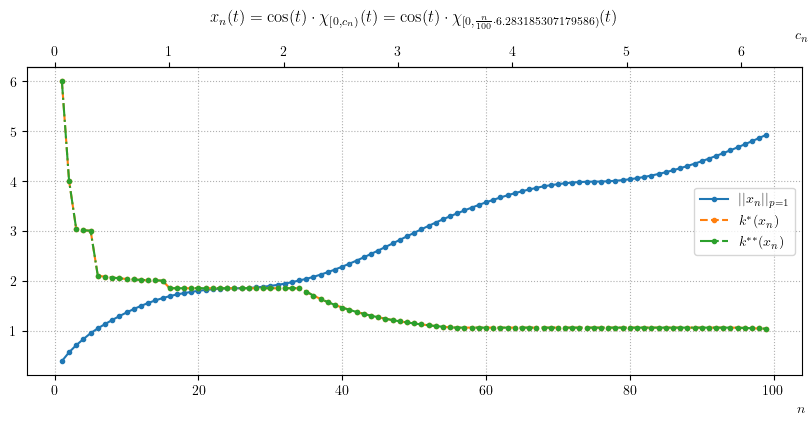

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(np.arange(n_min, n_max), [norms_1[1] for norms_1 in norms_1], ".--", label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_1[2] for norms_1 in norms_1], '.-.', label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

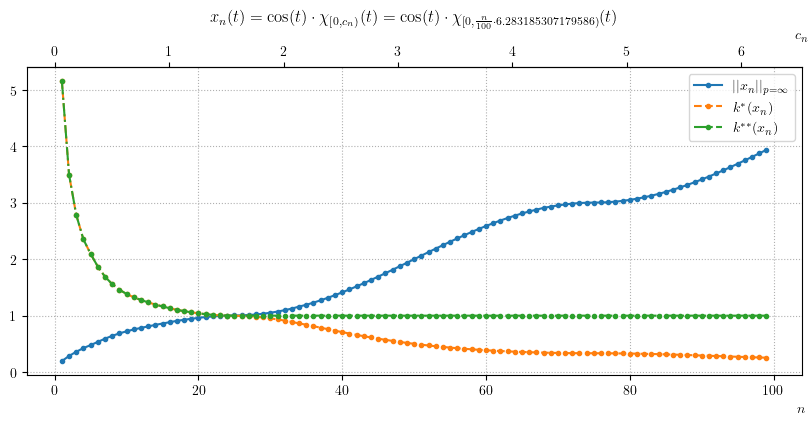

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_inf[0] for norms_inf in norms_inf], ".-",label='$||x_n||_{p=\infty}$')
ax.plot(np.arange(n_min, n_max), [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[2] for norms_inf in norms_inf], ".-.", label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
plt.legend();

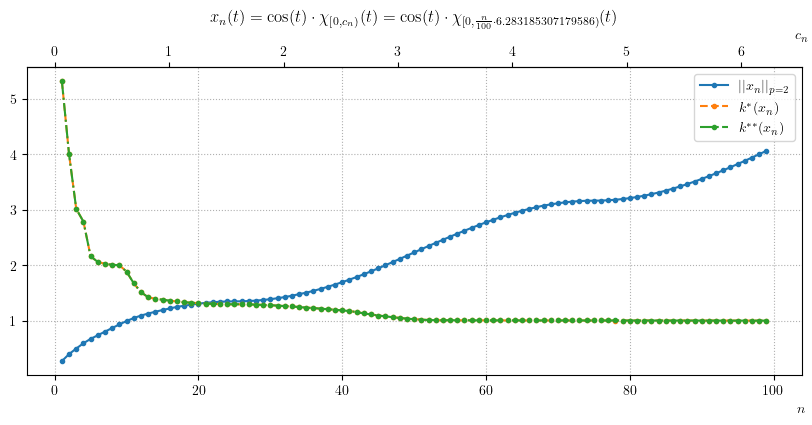

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_2[0] for norms_2 in norms_2], ".-",label='$||x_n||_{p=2}$')
ax.plot(np.arange(n_min, n_max), [norms_2[1] for norms_2 in norms_2], ".--",
        label='$k^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[2] for norms_2 in norms_2], ".-.",
        label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1);
ax.legend();

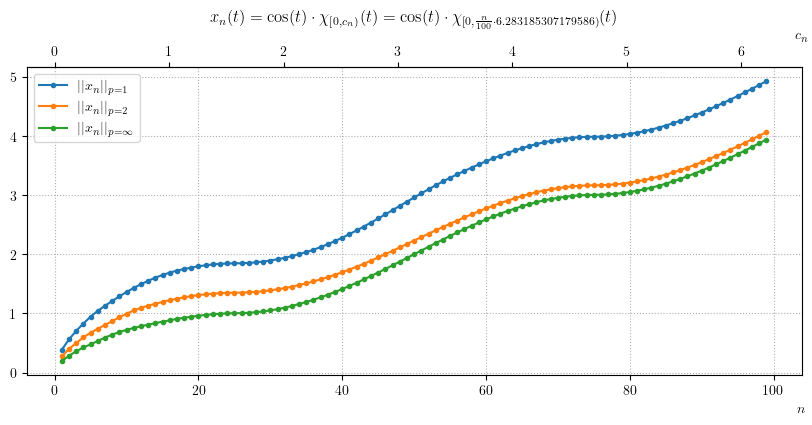

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[0] for norms_1 in norms_1], ".-",label='$||x_n||_{p=1}$')
ax.plot(np.arange(n_min, n_max), [norms_2[0] for norms_2 in norms_2], ".-",label='$||x_n||_{p=2}$')
ax.plot(np.arange(n_min, n_max), [norms_inf[0] for norms_inf in norms_inf], ".-",label='$||x_n||_{p=\infty}$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

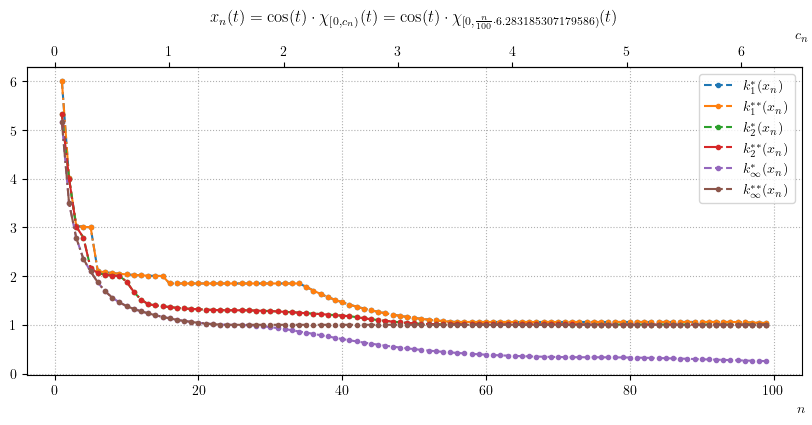

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n_min, n_max), [norms_1[1] for norms_1 in norms_1], ".--", label='$k_1^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_1[2] for norms_1 in norms_1], ".-.", label='$k_1^{**}(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[1] for norms_2 in norms_2], ".--", label='$k_2^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_2[2] for norms_2 in norms_2], ".-.",label='$k_2^{**}(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k_{{\\infty}}^*(x_n)$')
ax.plot(np.arange(n_min, n_max), [norms_inf[2] for norms_inf in norms_inf], ".-.",
        label='$k_{{\\infty}}^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();